In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import DataFrame
from collections import Counter

In [2]:
#### load dataset and create as dataframes

df = pd.read_csv("automobile.txt", sep = ",")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.drop(['symboling', 'normalized-losses', 'num-of-doors', 'engine-location', 'stroke', 'bore', 'compression-ratio'],axis=1, inplace=True)
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,21,27,13495
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,5000,21,27,16500
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,5000,19,26,16500
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,5500,24,30,13950
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,5500,18,22,17450


In [5]:
#Check if any duplicate rows
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

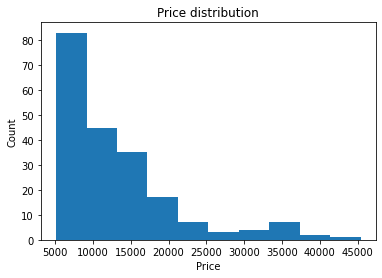

In [32]:
#check the distribution of price
plt.hist(df['price'])
plt.ylabel("Count")
plt.xlabel("Price")
plt.title("Price distribution")
plt.show

In [4]:
#check missing values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
#Even though there seems to be no missisng values the dataframe has question marks in a 
# column that seems like should be an integer
#Further checked datatypes for each column to check if column name from common knowledge 
# should be a float or int, those that says Object were checked
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [6]:
#After investigating a few columns using the below, it is suspected missing values 
# were filled with a question mark for this data
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

make                0
fuel-type           0
aspiration          0
body-style          0
drive-wheels        0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64


<AxesSubplot:>

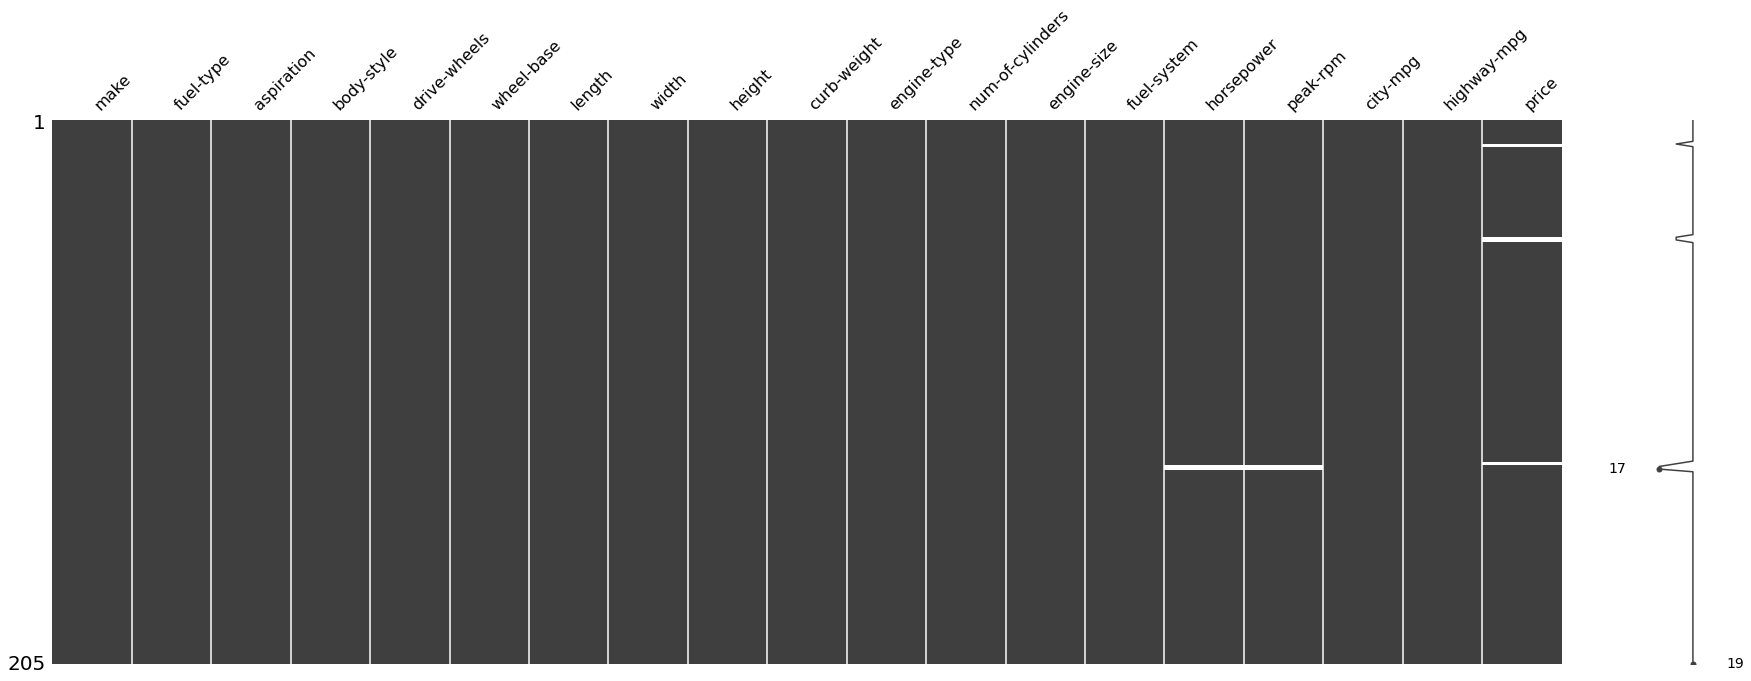

In [7]:
#checking missing values
df.replace('?', np.nan, inplace=True )
print(df.isnull().sum())
missingno.matrix(df, figsize = (30,10))  #plotting the missing values

In [9]:
#Dealing with Missing values.

#for numerical data
def impute_median(series):
    return series.fillna(series.median())
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['horsepower'] = df.groupby(['make', 'body-style'])['horsepower'].transform(impute_median)
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])                                                                        
df['peak-rpm'] = df.groupby(['make', 'body-style'])['peak-rpm'].transform(impute_median)
df['price'] = pd.to_numeric(df['price'])
df['price'] = df.groupby(['make', 'body-style'])['price'].transform(impute_median)

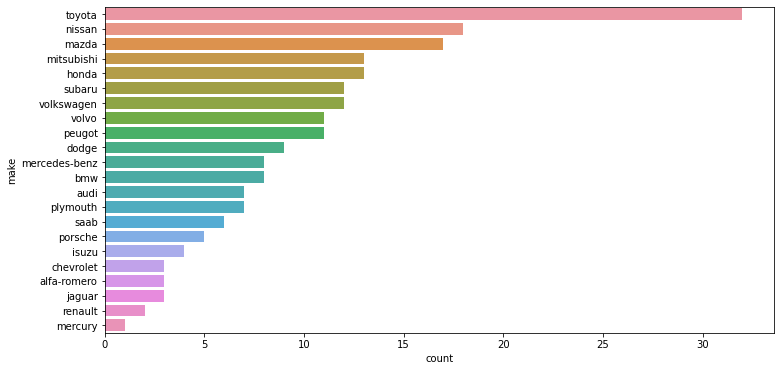

In [10]:
#Count of most cars by make
fig = plt.figure(figsize=(12,6))
sns.countplot(y=df['make'], data=df,order = df['make'].value_counts().index);

<function matplotlib.pyplot.show(close=None, block=None)>

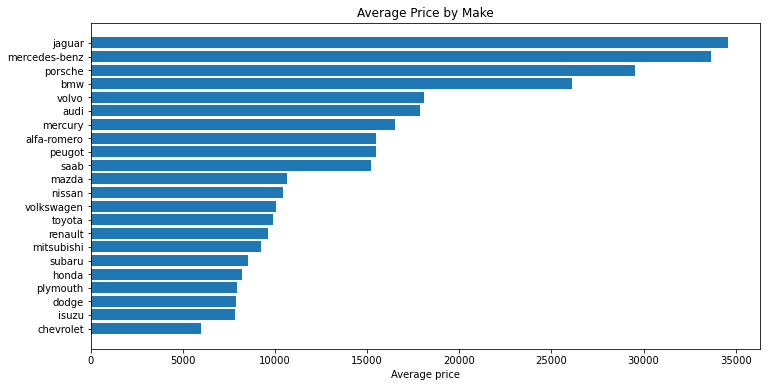

In [11]:
#Average price given make
make_avg_p = df.groupby(by=['make'])['price'].mean().reset_index()
sort_p = make_avg_p.sort_values('price', ascending=True)

plt.figure(figsize=(12,6))
plt.barh(sort_p['make'], sort_p['price'])
plt.xlabel("Average price")
plt.title("Average Price by Make")
plt.show
#Jaguar seems to have a few cars in terms of count but highest average price

In [12]:
#Top 10 most expensive cars by make
#Also explored the body type, mostly Sedan
df[['make', 'body-style', 'price']].sort_values('price', ascending=False).head(10)

,make,body-style,price
74,mercedes-benz,hardtop,45400.0
16,bmw,sedan,41315.0
73,mercedes-benz,sedan,40960.0
128,porsche,convertible,37028.0
17,bmw,sedan,36880.0
49,jaguar,sedan,36000.0
48,jaguar,sedan,35550.0
72,mercedes-benz,convertible,35056.0
71,mercedes-benz,sedan,34184.0
127,porsche,hardtop,34028.0


In [21]:
#Top 10 most cheapest cars by make and body type
#we see more hatchbacks
df[['make', 'body-style', 'price']].sort_values('price', ascending=True).head(10)

,make,body-style,price
138,subaru,hatchback,5118.0
18,chevrolet,hatchback,5151.0
50,mazda,hatchback,5195.0
150,toyota,hatchback,5348.0
76,mitsubishi,hatchback,5389.0
32,honda,hatchback,5399.0
89,nissan,sedan,5499.0
21,dodge,hatchback,5572.0
118,plymouth,hatchback,5572.0
51,mazda,hatchback,6095.0


<function matplotlib.pyplot.show(close=None, block=None)>

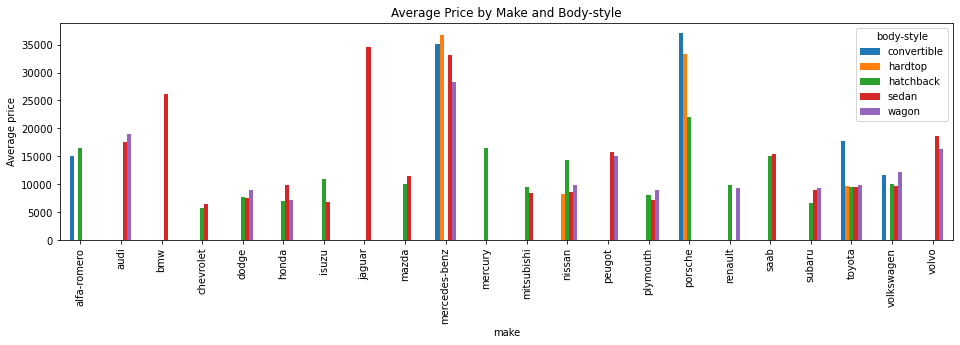

In [13]:
make_body = df.groupby(by=['make','body-style'])['price'].mean().reset_index()
make_body.pivot(index='make',values='price',columns='body-style').plot(kind='bar',figsize=(16,4))
plt.ylabel("Average price")
plt.title("Average Price by Make and Body-style")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

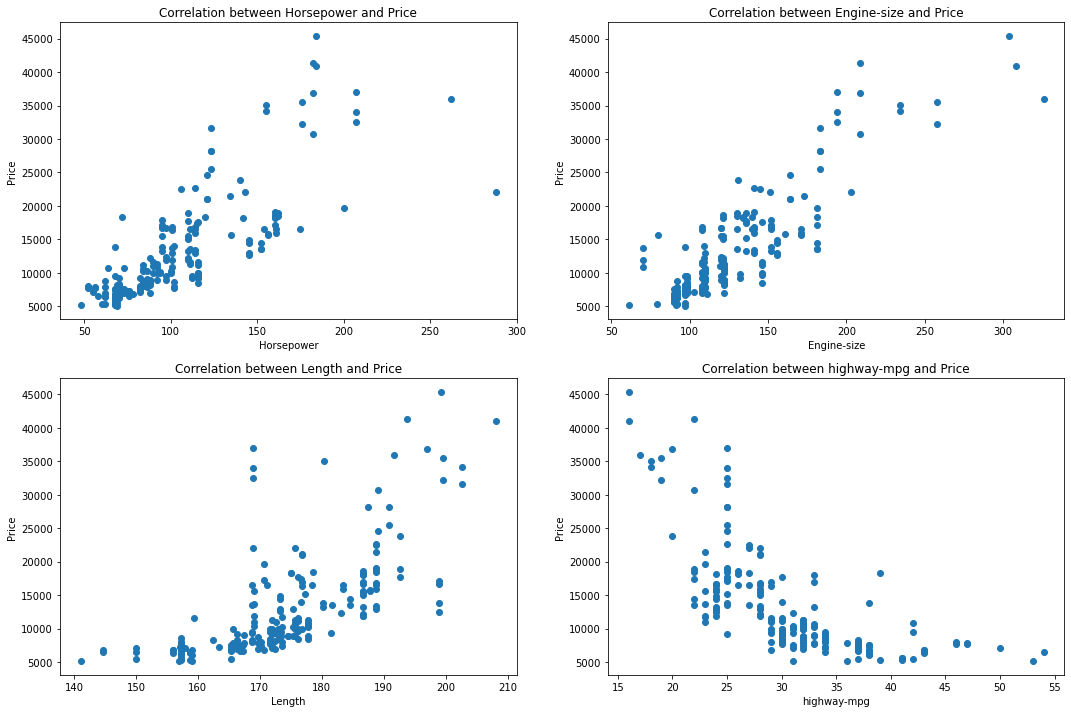

In [31]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
plt.scatter(df['horsepower'], df['price'])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Correlation between Horsepower and Price")
plt.show

plt.subplot(2, 2, 2)
plt.scatter(df['engine-size'], df['price'])
plt.xlabel("Engine-size")
plt.ylabel("Price")
plt.title("Correlation between Engine-size and Price")
plt.show

plt.subplot(2, 2, 3)
plt.scatter(df['length'], df['price'])
plt.xlabel("Length")
plt.ylabel("Price")
plt.title("Correlation between Length and Price")
plt.show

plt.subplot(2, 2, 4)
plt.scatter(df['highway-mpg'], df['price'])
plt.xlabel("highway-mpg")
plt.ylabel("Price")
plt.title("Correlation between highway-mpg and Price")
plt.show